In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob

sns.set(context='talk', style='white')

study_dir = '/Users/catcamacho/Library/CloudStorage/Box-Box/CRAB/CRAB_lab/studies/crab-seal_hbcdmovies_pilot_2025'
data_dir = os.path.join(study_dir, 'DATA','V1_motion_processed')
subinfo = pd.read_csv(os.path.join(study_dir,'DATA','redcap_exports','ChildMovieStudy-Basics_DATA_2025-05-06_1927.csv'),index_col=0)

subs = sorted(os.listdir(data_dir))
subinfo.index = subinfo.index.astype(str)
subinfo.head()

,redcap_event_name,setversion,credit_version,interest1,p_affect1,n_affect1,intensity1,m1_behavior___0,m1_behavior___1,m1_behavior___2,...,m1_behavior_6_v2___1,m1_behavior_6_v2___2,m1_behavior_6_v2___3,m1_behavior_6_v2___4,m1_behavior_6_v2___5,m1_otherbehavior_6_v2,notes6_v2,mockscanner_scanbuddy_complete,child_age,c_gender
record_id,,,,,,,,,,,,,,,,,,,,,
2002,618_survey_set_arm_1,2.0,NaN,3.0,4.0,0.0,3.0,0,0,0,...,0,0,0,0,0,NaN,NaN,2,6,1.0
2003,155_survey_set_arm_1,2.0,NaN,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,NaN,NaN,2,3,2.0
2004,155_survey_set_arm_1,2.0,NaN,2.0,1.0,3.0,3.0,0,0,0,...,0,0,0,1,0,"""this is when she was little""",this was written by MS as tech not scan buddy,2,4,2.0
2005,155_survey_set_arm_1,1.0,NaN,4.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,1,NaN,"Hand fidgeting/chewing, a small amount of movi...",2,3,2.0
2006,155_survey_set_arm_1,0.0,1.0,4.0,4.0,0.0,2.0,0,0,0,...,0,0,0,0,0,NaN,NaN,0,3,1.0


In [2]:
data = pd.DataFrame()
i=0
for sub in subs:
    subdata = pd.read_csv(os.path.join(data_dir, sub, '{0}_motion_summary.csv'.format(sub)), index_col=0)
    for movie in subdata.index:
        data.loc[i, 'sub'] = sub
        data.loc[i, 'age'] = subinfo.loc[sub, 'child_age']
        data.loc[i, 'sex'] = subinfo.loc[sub, 'c_gender']
        data.loc[i, 'movie'] = movie
        data.loc[i, 'meanFD'] = subdata.loc[movie, 'meanFD']
        data.loc[i, 'pcCens9'] = subdata.loc[movie, 'pcent_volscens_0.9']
        data.loc[i, 'pcCens2'] = subdata.loc[movie, 'pcent_volscens_0.2']
        i=i+1

data = data.sort_values('movie')
data.describe()

,age,sex,meanFD,pcCens9,pcCens2
count,94.000000,89.000000,87.000000,87.000000,87.000000
mean,4.989362,1.505618,1.040323,0.161220,0.451616
std,1.816855,0.502801,1.192406,0.147226,0.230218
min,3.000000,1.000000,0.093402,0.004013,0.042510
25%,3.000000,1.000000,0.366220,0.063172,0.282260
50%,5.000000,2.000000,0.546689,0.115854,0.438697
75%,6.000000,2.000000,1.332936,0.204104,0.623298
max,8.000000,2.000000,6.817039,0.632353,0.941176


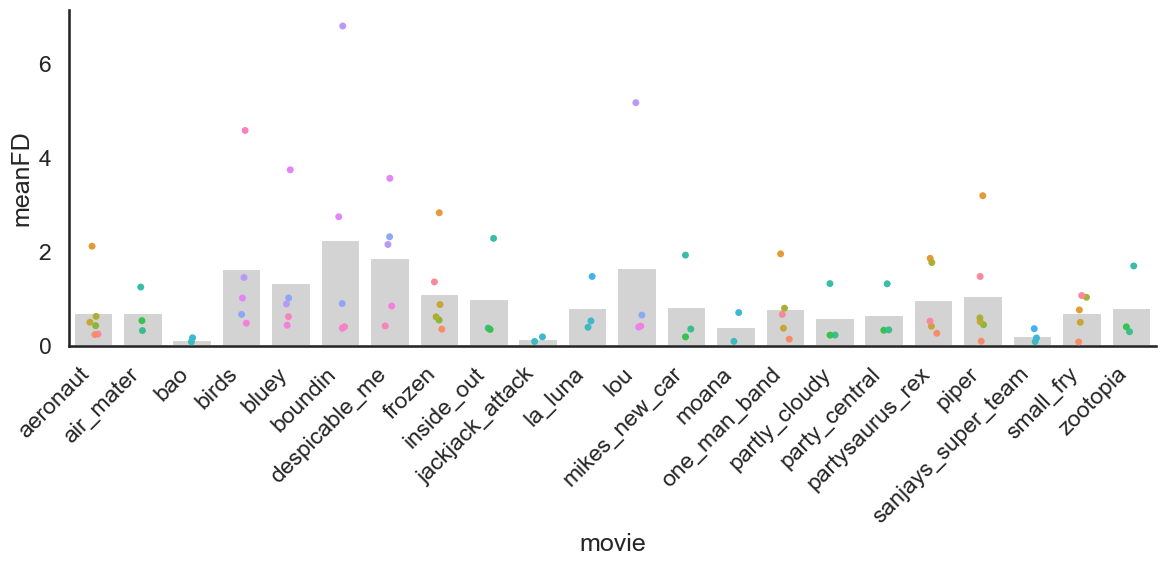

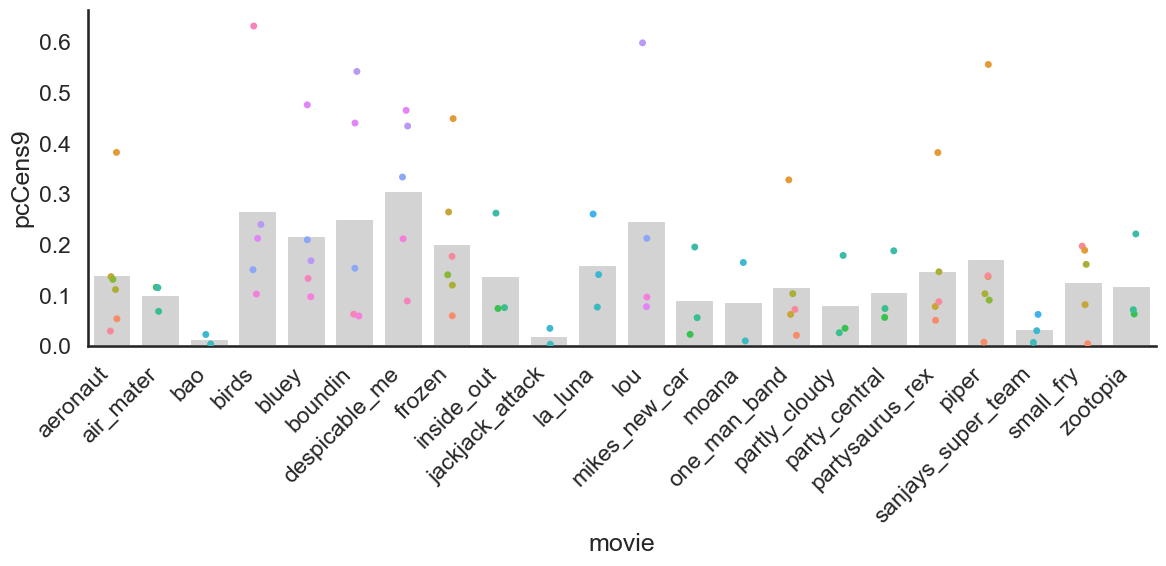

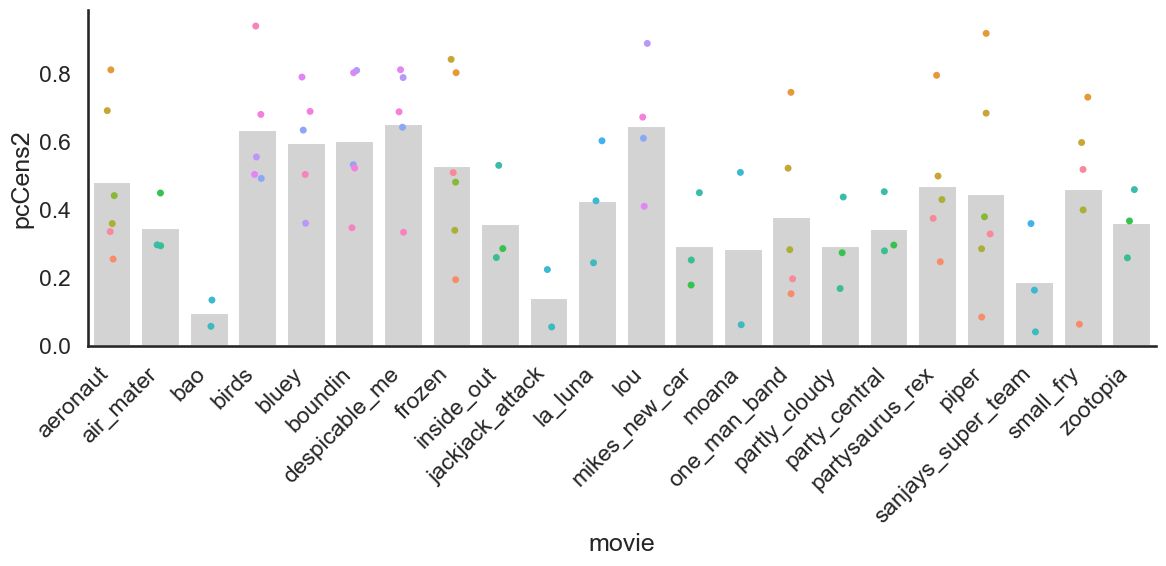

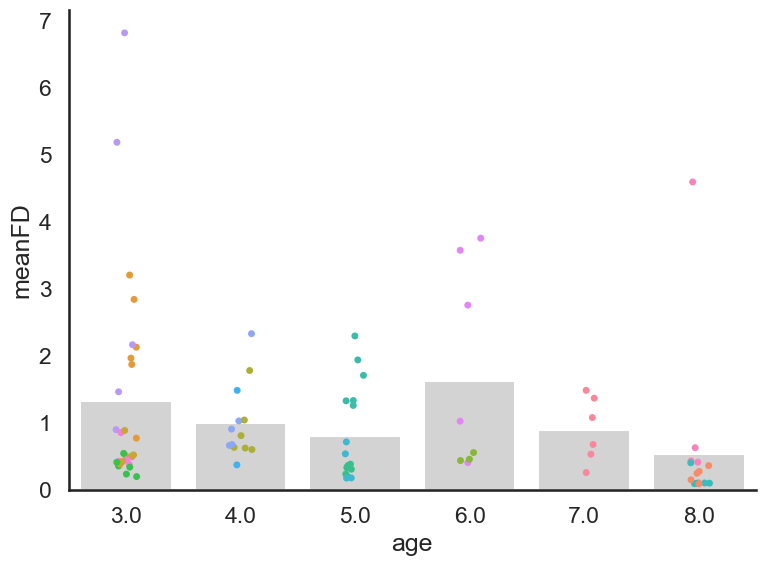

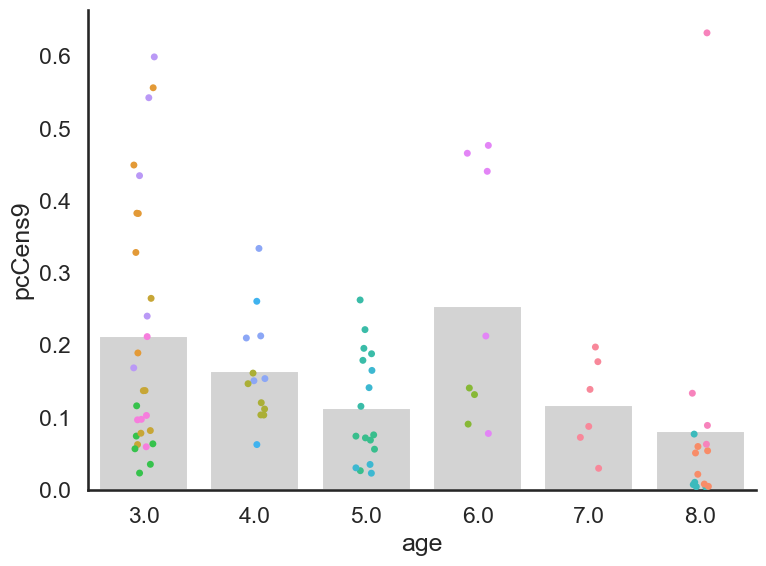

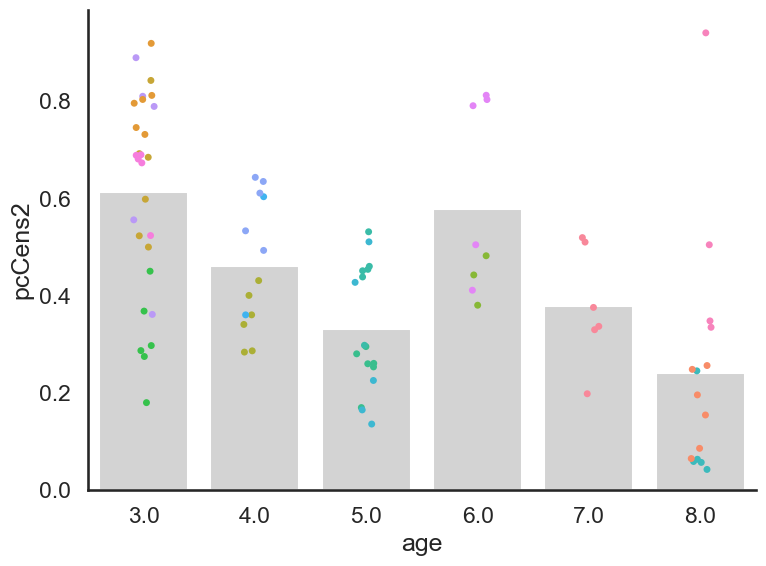

In [3]:
# plot mean FD

for v in ['meanFD','pcCens9','pcCens2']:

    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=data, color='lightgray',errwidth=0)#_kws={'linewidth': 0})
    sns.stripplot(y=v,x='movie', data=data, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.show()
    plt.close()

for v in ['meanFD','pcCens9','pcCens2']:

    plt.figure(figsize=(8,6))
    sns.barplot(y=v, x='age', data=data, color='lightgray',errwidth=0)#_kws={'linewidth': 0})
    sns.stripplot(y=v, x='age', data=data, hue='sub')#,color='lightgray', legend=False)
    plt.legend().remove()
    sns.despine()
    plt.tight_layout()
    plt.show()
    plt.close()